# Travelling salesman problem - Genetic Algorithms

In [1]:
import timeit
import matplotlib.pyplot as plt

from ga_travelling_salesman import cities_ts, population_ts
from ga_travelling_salesman import individual_fitness_ts, population_fitness_ts
from ga_travelling_salesman import population_switch_mutation_ts
from ga_travelling_salesman import population_ordered_crossover_ts
from ga_travelling_salesman import roulette_selection_ts

## Problem 

The problem here is a modified travelling salesman (TS), where he prefers to visit odd cities first. The objective is to find the shorter path, starting from the city number 0, passing through every city, with the odd ones coming first, and returning to the intial city at last. The cities are represented as $(x, y)$ coordinates, and the individuals are lists representing a sequence of cities. For simplification, we choosed to exclude the city number zero from the start and end of the solution, as this is a constraint of the problem, so the solutions have one less element than the number of cities.

The operators utilized were:
- Switch mutation: each individual has a certain probability of having two genes switched. Because each city can only appear once in the list, switching two of them is the easiest way to mutate them.

- Orderd crossover: two solutions combine to create two new solutions. We start partitioning the solutions in the same spots, and creating two new solutions. Let us say `individual1` was generated by a partition of `parent1`. Then, we will iterate through `parent2`, and add every city that is not in the new solution. We do that until the solution is the same size as their parents. The same is done for the other solution.

- Roulette selection: each individual is selected with probability proportional to its fitness. In this case, we have a function that needs to be minimized, i.e., the wheights are the inverse of the fitness.

The objective function to be minimized is the difference between two solutions. It can be written as:
\begin{equation}
f(X) = d(x_0, x_1) + d(x_n, x_0) + \sum_{i=1}^{n-1} d(x_i, x_{i+1}) + P(X, p)
\end{equation}
Here, $X=\{x_1, \cdots, x_n\}$ is a solution, $x_0$ is the starting city, $d(\cdot)$ is the Euclidean distance, and $P(X, p)$ is a penalty for the solution having even cities first. The penalty is calculated as follows: we loop through the beggining elements of $X$ (only until the number of possible odd cities is over), and check if that element is even or odd. If it is even, we add a certain amount $p$ to the fitness function, controled by the parameter `penalty`. 

## Simulations

Defining the constants of the problem, which can be modified.

In [2]:
NUM_CITIES = 10
COORD_MAX = 100

GENERATIONS = 100
POPULATION_SIZE = 1000
PENALTY = 1000
SWITCH_MUTATION_RATE = 0.1
ORDERED_CROSSOVER_RATE = 0.5

Applying the GA.

In [3]:
CITIES = cities_ts(NUM_CITIES, COORD_MAX)
population = population_ts(POPULATION_SIZE, NUM_CITIES)
hof = []

start = timeit.default_timer()

for _ in range(GENERATIONS):
    #Fitness calculation and selection
    fitness = population_fitness_ts(population, CITIES, penalty=PENALTY)
    selected_population = roulette_selection_ts(population, fitness)
    
    #Crossover
    crossover_population = population_ordered_crossover_ts(selected_population, ORDERED_CROSSOVER_RATE)
    
    #Switch mutation
    mutated_population = population_switch_mutation_ts(crossover_population, SWITCH_MUTATION_RATE)
    
    #HOF atualization
    fitness = population_fitness_ts(mutated_population, CITIES, penalty=PENALTY)
    best_fitness = min(fitness)
    index = fitness.index(best_fitness)
    best_individual = mutated_population[index]
    hof.append(best_individual)
        
    #Restarting the population
    population = mutated_population
    
end = timeit.default_timer()

In [4]:
fitness = population_fitness_ts(hof, CITIES, penalty=0)
best_fitness = min(fitness)
index = fitness.index(best_fitness)
solution = hof[index]

print(f'solution: {solution}, fitness={best_fitness}')
print()
print(f'runtime={(end - start):.3f}s')

solution: [3, 7, 1, 9, 5, 4, 6, 2, 8], fitness=458.8312551316301

runtime=6.812s


Note that the parameter `penalty` is only used during the GA, but at the end, we only want to know the actual distance travelled. 

## Visualization

Now, we will plot some graphics to see the TS solution.

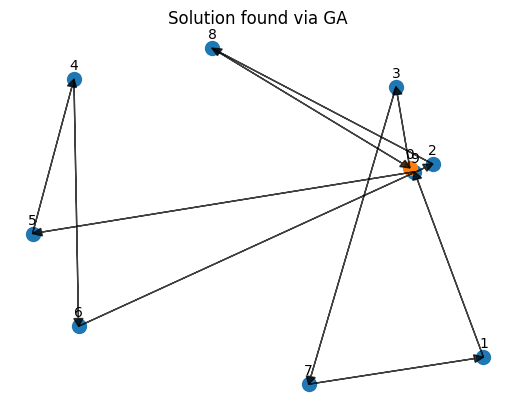

In [6]:
x0, y0 = CITIES[0][0], CITIES[0][1] 
x, y = [CITIES[i][0] for i in solution], [CITIES[i][1] for i in solution]
labels = [i for i in range(len(CITIES))]

plt.scatter(x, y, s=100)
plt.scatter(x0, y0, s=100)
plt.annotate(0, (x0, y0), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

for i, label in enumerate(labels[1:]):
    plt.annotate(label, (x[i], y[i]), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.arrow(x0, y0, dx=(x[solution[0] - 1] - x0), dy=(y[solution[0] - 1] - y0), 
          color='k', length_includes_head=True, head_length=2., head_width=2, alpha=0.75)

plt.arrow(x[solution[-1] - 1], y[solution[-1] - 1], dx=(x0 - x[solution[-1] - 1]), dy=(y0 - y[solution[-1] - 1]), 
          color='k', length_includes_head=True, head_length=2., head_width=2, alpha=0.75)

for i in range(1, len(solution)):
    plt.arrow(x[solution[i - 1] - 1], y[solution[i - 1] - 1], dx=(x[solution[i] - 1] - x[solution[i - 1] - 1]), 
              dy=(y[solution[i] - 1] - y[solution[i - 1] - 1]), color='k', alpha=0.75, length_includes_head=True, 
              head_length=2., head_width=2)

plt.title('Solution found via GA')
plt.axis('off')
plt.show()

## Generations

Now, we will fix a certain configuration of cities, and see how much the number of generations influence on the final result. For that, we will increase some parameters to support the increase of cities.

In [7]:
GENERATIONS = [50, 100, 150, 200, 250, 300]
NUM_CITIES = 20
POPULATION_SIZE = 2000
COORD_MAX = 1000
PENALTY = 10000


CITIES = cities_ts(NUM_CITIES, COORD_MAX)

In [8]:
population = population_ts(POPULATION_SIZE, NUM_CITIES)
hof = []

for generation in GENERATIONS:
    for _ in range(generation):
        #Fitness calculation and selection
        fitness = population_fitness_ts(population, CITIES, penalty=PENALTY)
        selected_population = roulette_selection_ts(population, fitness)

        #Crossover
        crossover_population = population_ordered_crossover_ts(selected_population, ORDERED_CROSSOVER_RATE)

        #Switch mutation
        mutated_population = population_switch_mutation_ts(crossover_population, SWITCH_MUTATION_RATE)

        #HOF atualization
        fitness = population_fitness_ts(mutated_population, CITIES, penalty=PENALTY)
        best_fitness = min(fitness)
        index = fitness.index(best_fitness)
        best_individual = mutated_population[index]
        hof.append(best_individual)

        #Restarting the population
        population = mutated_population

    fitness = population_fitness_ts(hof, CITIES, penalty=0)
    best_fitness = min(fitness)
    index = fitness.index(best_fitness)
    solution = hof[index]

    print(f'solution: {solution}, fitness={best_fitness:.1f}, generations={generation}')
    print()

solution: [15, 3, 10, 11, 19, 13, 5, 1, 7, 17, 6, 14, 9, 12, 8, 2, 18, 4, 16], fitness=7082.5, generations=50

solution: [9, 17, 19, 11, 13, 5, 15, 7, 3, 1, 14, 12, 6, 10, 18, 4, 16, 2, 8], fitness=6681.3, generations=100

solution: [9, 17, 19, 11, 13, 5, 15, 7, 3, 1, 14, 12, 6, 10, 18, 4, 16, 2, 8], fitness=6681.3, generations=150

solution: [9, 17, 19, 11, 13, 5, 15, 7, 3, 1, 14, 12, 6, 10, 18, 4, 16, 2, 8], fitness=6681.3, generations=200

solution: [13, 15, 5, 19, 11, 17, 9, 7, 1, 3, 6, 14, 12, 10, 18, 4, 16, 8, 2], fitness=6413.3, generations=250

solution: [13, 15, 5, 19, 11, 17, 9, 7, 1, 3, 6, 14, 12, 10, 18, 4, 16, 8, 2], fitness=6413.3, generations=300



As we can see, with more cities, more generations are useful in order to obtain best solutions, although the computational cost also increases.